# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_16857/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

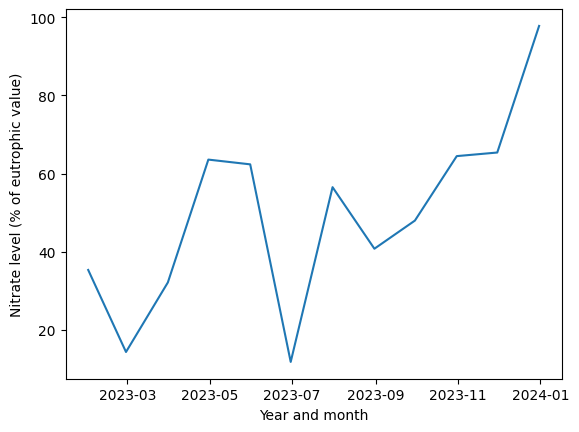

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_16857/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

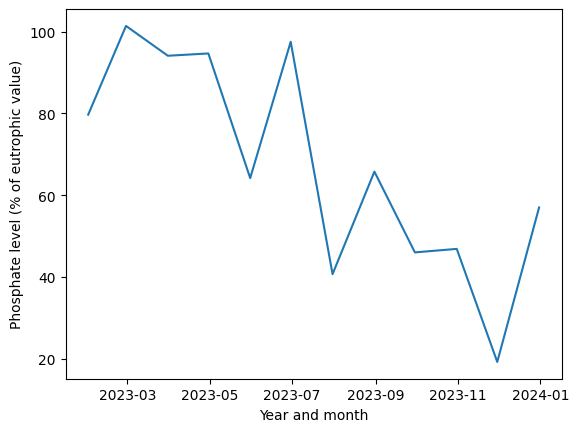

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

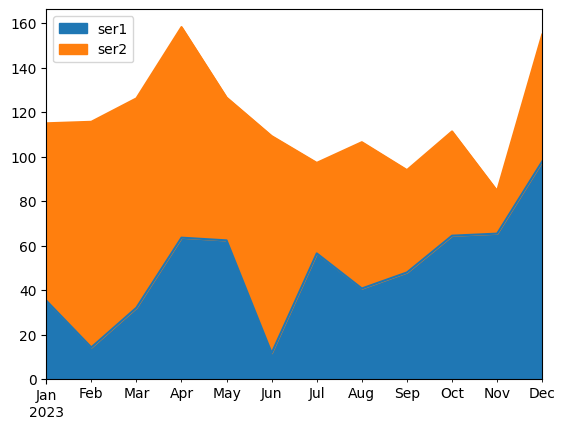

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Find correlations between pairs of variables.

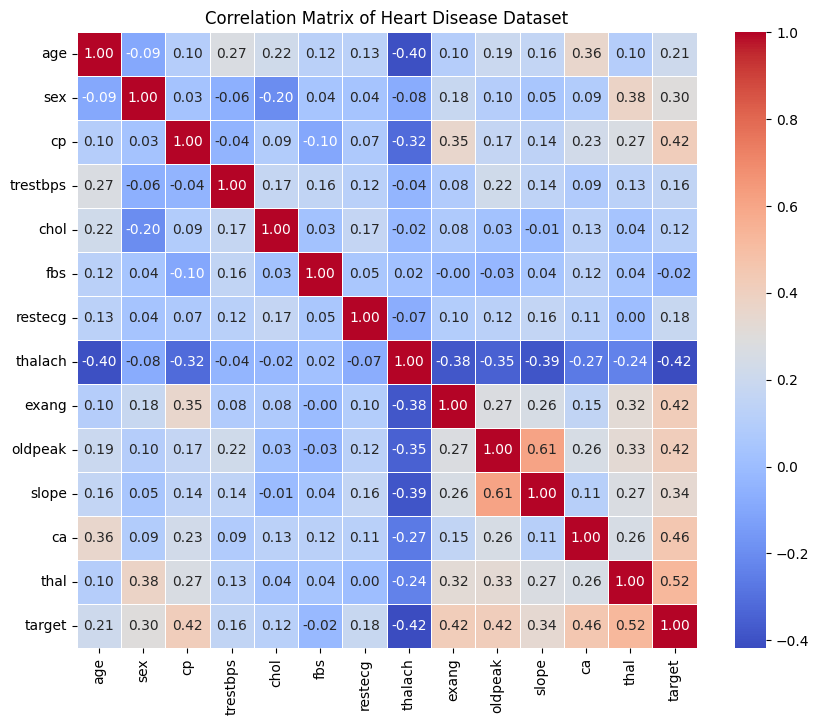

In [7]:
# Load dataset
df = pd.read_csv("Heart_disease_statlog.csv")

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

Draw scatterplots, especially when the correlation is large.

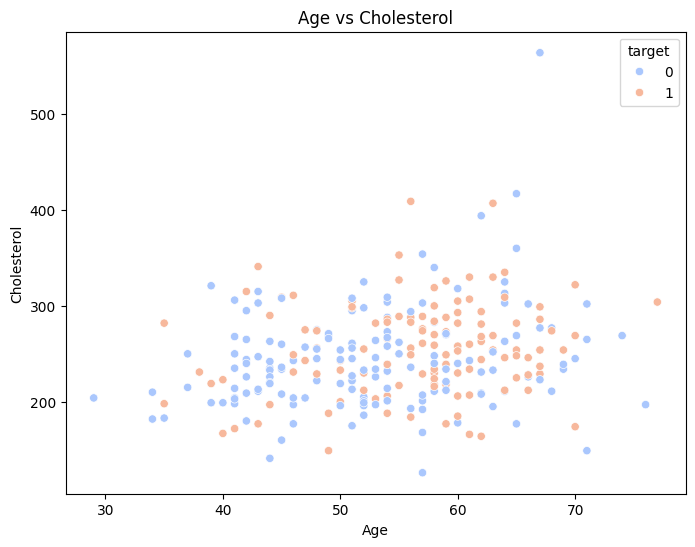

In [8]:
# Scatterplot for age vs. cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

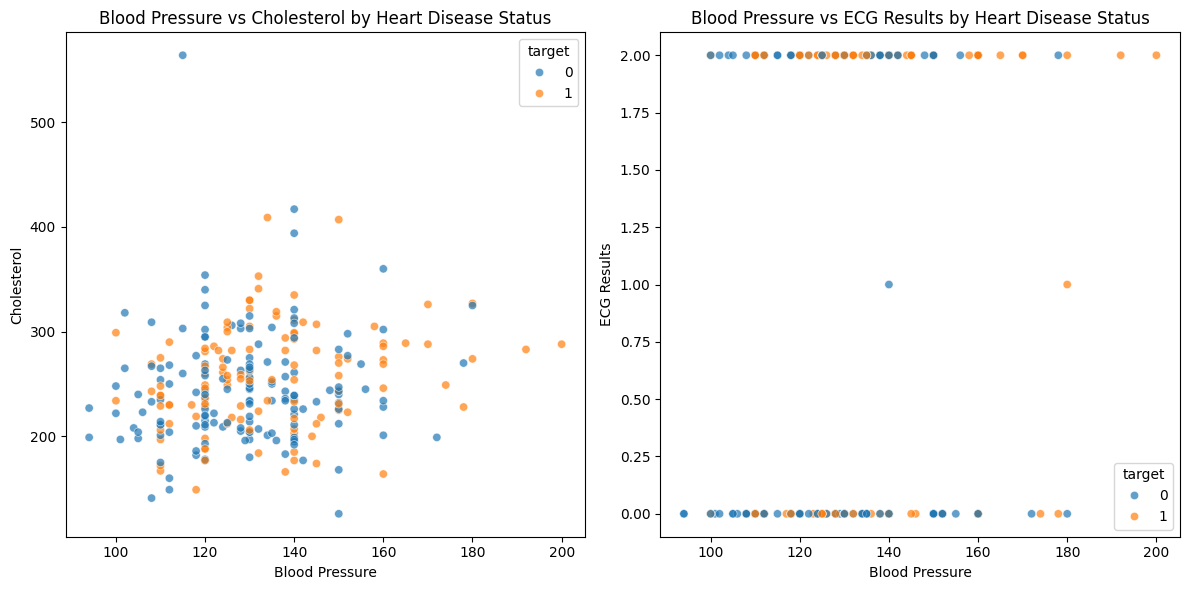

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot with 2 columns for comparison
plt.figure(figsize=(12, 6))

# Scatter plot: Blood Pressure vs Cholesterol
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="trestbps", y="chol", hue="target", alpha=0.7)
plt.title("Blood Pressure vs Cholesterol by Heart Disease Status")
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")

# Scatter plot: Blood Pressure vs ECG Results
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="trestbps", y="restecg", hue="target", alpha=0.7)
plt.title("Blood Pressure vs ECG Results by Heart Disease Status")
plt.xlabel("Blood Pressure")
plt.ylabel("ECG Results")

plt.tight_layout()
plt.show()


Draw pairplots

The pairplot will show scatterplots between each pair of variables, along with histograms along the diagonal. This helps in understanding how variables interact, and whether certain combinations of features are linked to the presence or absence of heart disease.

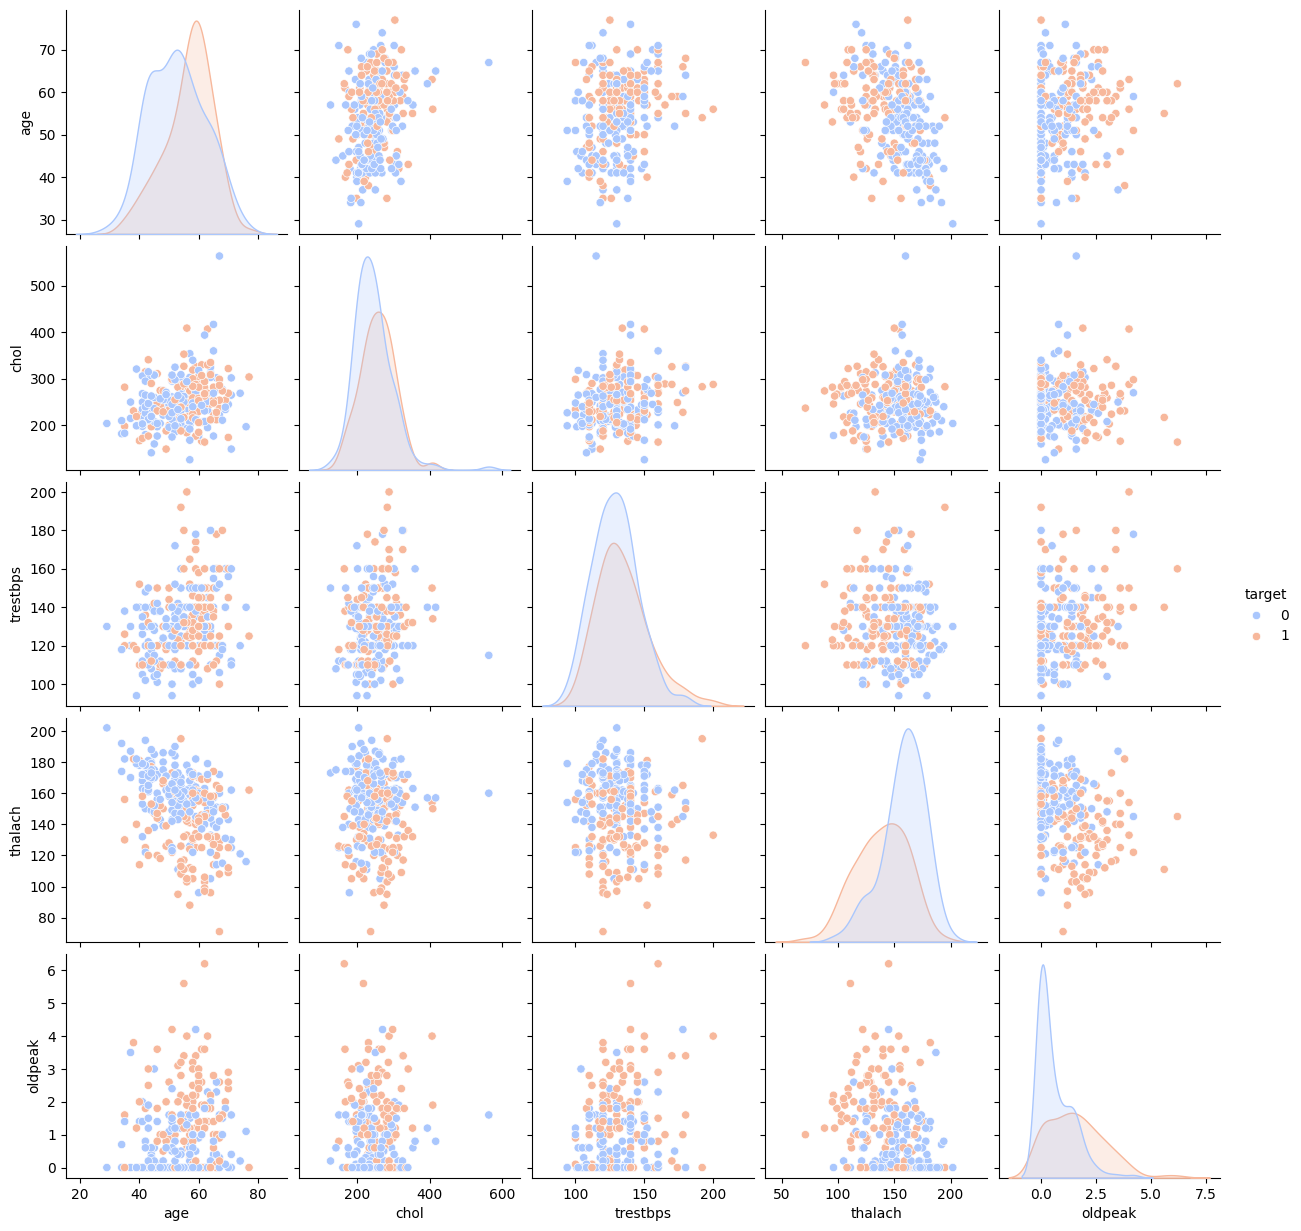

In [ ]:
# Pairplot to visualize relationships between selected variables
sns.pairplot(df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target']], hue='target', palette='coolwarm')
plt.show()

Draw line graphs and/or area graphs when there is date or time data together with numerical data.

This dataset doesn't have time or date-based data, this question doesn't apply directly. 

Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

Data Quality: The dataset seems clean with no missing values, and the correlation heatmap suggests that some variables are strongly related. For example, chol (cholesterol) and trestbps (blood pressure) might show a correlation with the target variable, which is heart disease presence (target).

Do you see any outliers?  (Data points that are far from the rest of the data).


Outliers: We might observe outliers in variables like cholesterol or age, where values are unusually high or low compared to the majority of the dataset. This would be evident in scatterplots or by observing extreme values in the histograms.

For example, high cholesterol values (up to 564 mg/dL) are outliers, as most individuals have values below 300 mg/dL.

Are any data items highly correlated with each other, suggesting that they are redundant?

Redundant Data: Some variables might be highly correlated, such as age and trestbps, meaning they both contribute to the risk of heart disease. If two variables are highly correlated, one could potentially be dropped to reduce redundancy in modeling. I would like to keep them for now and see if I need to reevaluate this later. 

For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

Trends over Time: Since we don't have time-related data, this isn't applicable to the dataset, but if we had a time-based feature (e.g., cholesterol measurements over time), a line graph could show if levels are increasing or decreasing over time, potentially signaling a trend that needs attention.

Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

Confounding Variables: Variables like sex, age, and exang (exercise-induced angina) could act as confounding variables. For example, older individuals might have higher cholesterol and blood pressure, which could confound the relationship between cholesterol and heart disease. Understanding these relationships is critical for making more accurate predictions and interventions.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_36510/314301187.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='chol', data=df, palette='Set2')


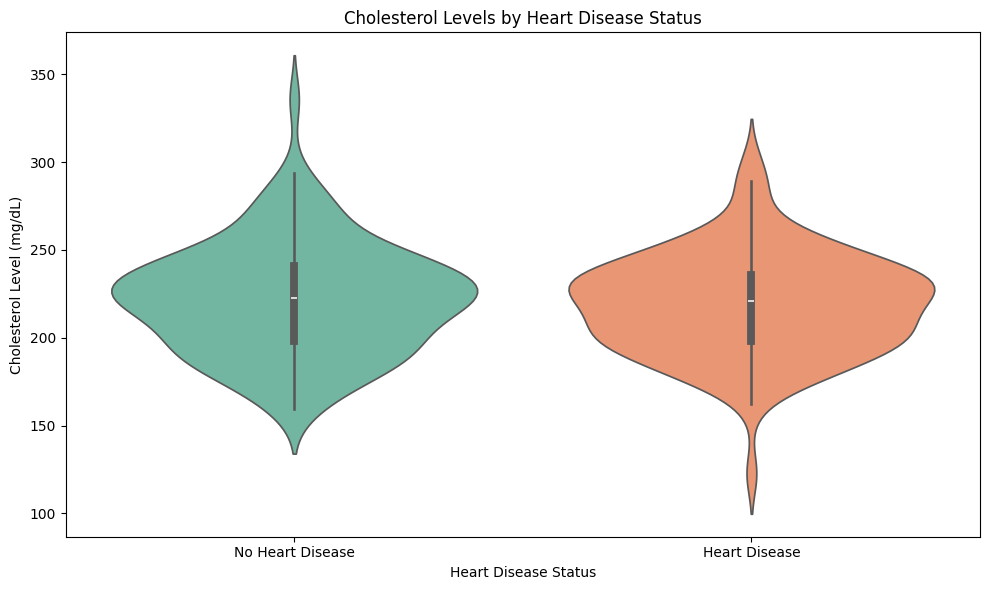

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data: Let's generate some mock data for illustration
np.random.seed(42)
data = {
    'target': np.random.choice([0, 1], size=200),  # 0 for no disease, 1 for heart disease
    'chol': np.random.normal(loc=220, scale=30, size=200)  # Simulate cholesterol levels
}

df = pd.DataFrame(data)

# Create a violin plot comparing cholesterol levels across heart disease status (target variable)
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='chol', data=df, palette='Set2')

# Title and labels
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Cholesterol Level (mg/dL)')

# Customize x-axis ticks
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Show the plot
plt.tight_layout()
plt.show()